In [841]:
# Importing Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',500)


In [842]:
# Reading data from csv file
df_country = pd.read_csv('E:\\UPGRAD-study\\Assignment\\Clustering and PCA Assignment\\Country-data.csv')

In [843]:
# Having a look at the data
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [844]:
df_country.info() # checking info whether data has null value or checking dtypes of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 12.4+ KB


In [845]:
df_country.describe() # checking statistical data of numeric columns

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [846]:
df_country.shape # Checking the number of rows and columns of the data frame

(167, 10)

In [847]:
df_country.isnull().sum() # checking null values

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Converting % values to real number

In [848]:
# converting % columns i.e exports , imports and health into real numbers
df_country['exports'] = (df_country['exports'] /df_country['gdpp'])*100
df_country['imports'] = (df_country['imports'] /df_country['gdpp'])*100
df_country['health'] = (df_country['health'] /df_country['gdpp'])*100

In [849]:
df_country.head() # after modiying checking the data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,1.808318,1.370705,8.119349,1610,9.44,56.2,5.82,553
1,Albania,16.6,0.684597,0.160147,1.188264,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,0.860987,0.093498,0.704036,12900,16.10,76.5,2.89,4460
3,Angola,119.0,1.764873,0.080737,1.215297,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,0.372951,0.049426,0.482787,19100,1.44,76.8,2.13,12200


In [850]:
df_country.describe() # looking at the numerical columns statistics

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,1.441084,0.355765,2.395925,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,1.829798,0.646116,3.738993,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.011032,0.002575,0.006670,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,0.273842,0.041148,0.244265,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,0.733918,0.119816,0.921127,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,1.878930,0.396947,2.729061,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,12.305389,5.021645,28.318043,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Creating Box plot to check for outliers

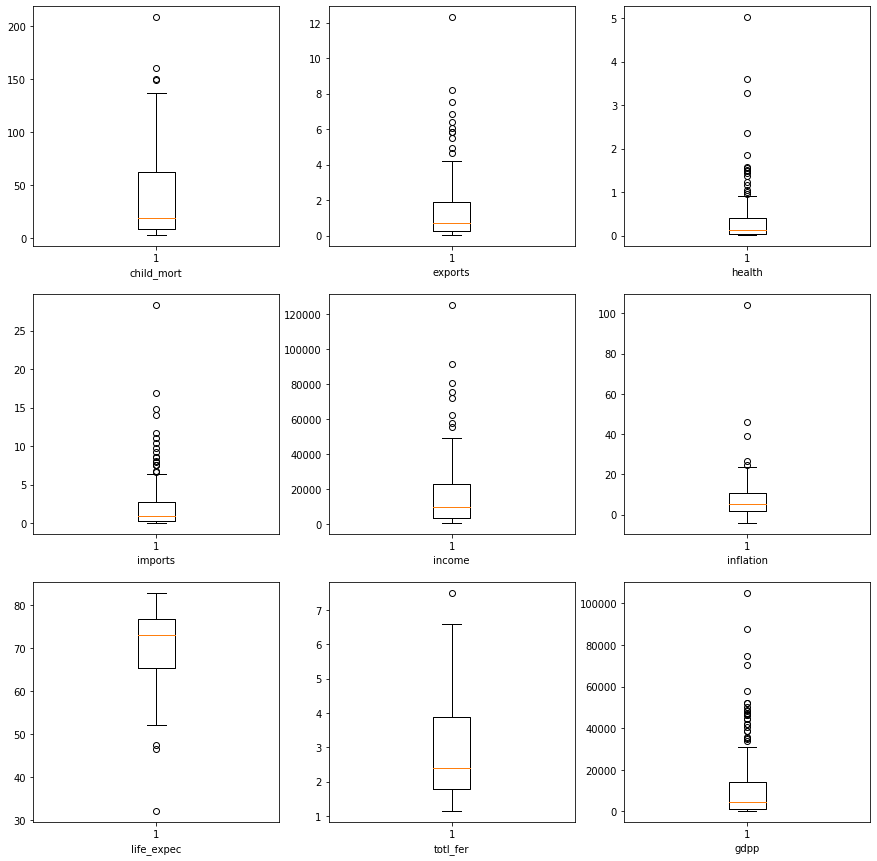

In [851]:
plt.figure(figsize=(15, 15))
plt.subplot(3,3,1)
plt.boxplot(x = 'child_mort',data = df_country)
plt.xlabel('child_mort')
plt.subplot(3,3,2)
plt.boxplot(x = 'exports',data = df_country)
plt.xlabel('exports')
plt.subplot(3,3,3)
plt.boxplot(x = 'health',data = df_country)
plt.xlabel('health')
plt.subplot(3,3,4)
plt.boxplot(x = 'imports',data = df_country)
plt.xlabel('imports')
plt.subplot(3,3,5)
plt.boxplot(x = 'income',data = df_country)
plt.xlabel('income')
plt.subplot(3,3,6)
plt.boxplot(x = 'inflation',data = df_country)
plt.xlabel('inflation')
plt.subplot(3,3,7)
plt.boxplot(x = 'life_expec',data = df_country)
plt.xlabel('life_expec')
plt.subplot(3,3,8)
plt.boxplot(x = 'total_fer',data = df_country)
plt.xlabel('totl_fer')
plt.subplot(3,3,9)
plt.boxplot(x = 'gdpp',data = df_country)
plt.xlabel('gdpp')
plt.show()

In [852]:
country = df_country['country'] # separating the country column from main dataframe and preparing data for scaling

In [853]:
df_country1 = df_country.drop(['country'],axis=1) # dropping country column from main dataframe

### Scaling the Data

In [854]:
from sklearn.preprocessing import StandardScaler # importing libraries

In [855]:
scaler = StandardScaler() # initialising instance of StandardScaler()

In [856]:
X = df_country1.copy() # making a new copy of main dataframe 

In [857]:
x=scaler.fit_transform(X) # Perform fit_transform  

In [858]:
x.shape # checking shape of the data

(167, 9)

### Applying PCA  on the data

In [859]:
from sklearn.decomposition import PCA 

In [860]:
pca = PCA(random_state=10,svd_solver='randomized')

In [861]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=10,
    svd_solver='randomized', tol=0.0, whiten=False)

In [862]:
pca.components_ # looking at PCA components

array([[ 0.38114769,  0.35492444,  0.33479187,  0.35821258, -0.3169913 ,
         0.11761124, -0.38304932,  0.37001762, -0.3006618 ],
       [ 0.02508328, -0.26064645, -0.40082685, -0.40399902, -0.39635424,
         0.46518451, -0.09716571,  0.0048653 , -0.47391848],
       [ 0.23534123, -0.03733846,  0.00448544, -0.06484034,  0.44903727,
         0.69813634, -0.07420346,  0.27302209,  0.41221345],
       [-0.44294963,  0.22027375,  0.31919404,  0.30287484, -0.10478709,
         0.51501676,  0.40599677, -0.30505717, -0.16595557],
       [ 0.0638946 , -0.78539137,  0.59997606,  0.04003459, -0.04432434,
         0.00699488, -0.09482606, -0.06783123, -0.04355689],
       [ 0.14122975,  0.08011802, -0.08472649,  0.12909899,  0.17972218,
         0.09938973, -0.57595133, -0.75867506, -0.01743492],
       [-0.37266438, -0.00736421,  0.03011282, -0.01414355,  0.6398483 ,
        -0.06506395, -0.21959912,  0.24718005, -0.5805164 ],
       [ 0.41909597,  0.29509336,  0.40022859, -0.60013764,  0

In [863]:
pca.explained_variance_ratio_ # looking at the variance ratio 

array([0.59073994, 0.14077604, 0.11244125, 0.06540865, 0.03636624,
       0.02503328, 0.01122407, 0.00926244, 0.00874809])

### Plotting bar plot

Text(0, 0.5, 'Explained_Variance_Ratio')

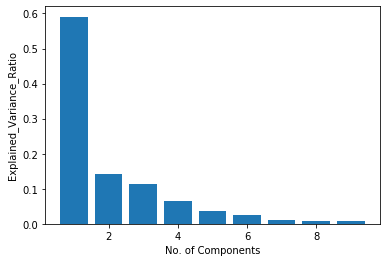

In [864]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.xlabel('No. of Components')
plt.ylabel('Explained_Variance_Ratio')

In [865]:
cum_value = pca.explained_variance_ratio_.cumsum() # cumulative sum of the explained_variance_ratio

In [866]:
cum_value

array([0.59073994, 0.73151598, 0.84395723, 0.90936588, 0.94573212,
       0.9707654 , 0.98198947, 0.99125191, 1.        ])

### Plotting Scree Plot

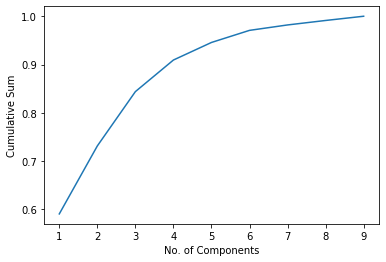

In [867]:
# Plotting Scree plot
plt.plot(range(1,len(cum_value)+1),cum_value)
plt.xlabel('No. of Components')
plt.ylabel('Cumulative Sum')
plt.show()

### Creating PCA using  5 components

In [868]:
from sklearn.decomposition import IncrementalPCA
pc2= IncrementalPCA(n_components=5)

In [869]:
new_df = pc2.fit_transform(x) 

In [870]:
new_df[:5,:5]

array([[-3.44414454,  0.3899039 ,  0.31750843, -0.50018244, -1.02667336],
       [ 0.90837147, -0.51780302, -0.96354567,  0.42539555, -0.12745409],
       [ 0.48399188, -1.03076312,  0.18081331,  0.59129493,  0.06119358],
       [-2.31470706, -1.54423966,  1.6724809 , -1.31258907,  0.25715976],
       [ 1.3768552 , -0.16615447, -0.69846222,  0.01291776, -0.07072721]])

In [871]:
new_df = np.transpose(new_df)

In [872]:
new_df.shape

(5, 167)

In [873]:
# Creating a new dataframe with 5 principal components
pca_final = pd.DataFrame({'PCA1': new_df[0],
                          'PCA2':new_df[1],
                          'PCA3':new_df[2],
                          'PCA4':new_df[3],
                          'PCA5':new_df[4]})

In [874]:
pca_final.head() # loooking at the head of the data

,PCA1,PCA2,PCA3,PCA4,PCA5
0,-3.444145,0.389904,0.317508,-0.500182,-1.026673
1,0.908371,-0.517803,-0.963546,0.425396,-0.127454
2,0.483992,-1.030763,0.180813,0.591295,0.061194
3,-2.314707,-1.544240,1.672481,-1.312589,0.257160
4,1.376855,-0.166154,-0.698462,0.012918,-0.070727


In [875]:
pca_final = pd.concat([pca_final,country],axis=1) #Concating new dataframe wih country column

In [876]:
pca_final.head() # looking at the head of the data

,PCA1,PCA2,PCA3,PCA4,PCA5,country
0,-3.444145,0.389904,0.317508,-0.500182,-1.026673,Afghanistan
1,0.908371,-0.517803,-0.963546,0.425396,-0.127454,Albania
2,0.483992,-1.030763,0.180813,0.591295,0.061194,Algeria
3,-2.314707,-1.544240,1.672481,-1.312589,0.257160,Angola
4,1.376855,-0.166154,-0.698462,0.012918,-0.070727,Antigua and Barbuda


### Outlier Detection

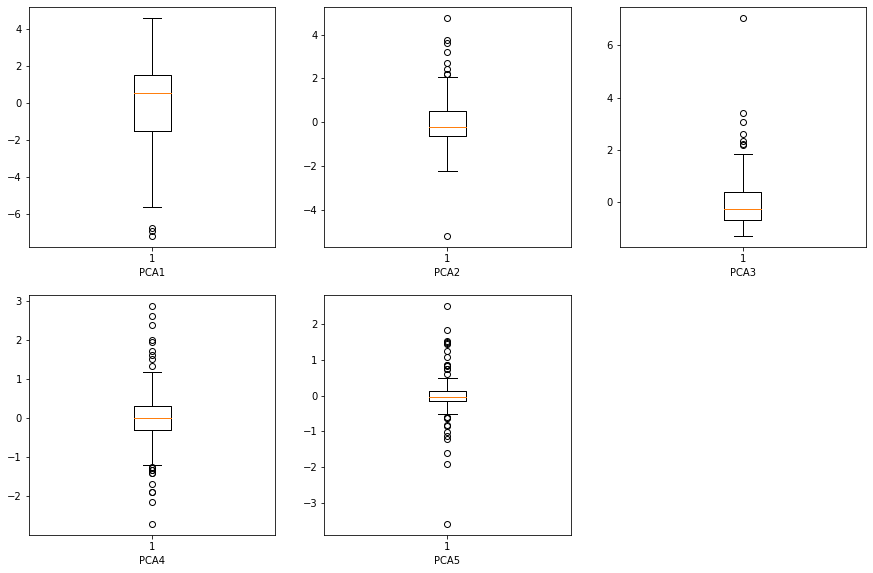

In [877]:
# plotting boxplot to look for identifier
plt.figure(figsize=(15, 15))
plt.subplot(3,3,1)
plt.boxplot(x = 'PCA1',data = pca_final)
plt.xlabel('PCA1')
plt.subplot(3,3,2)
plt.boxplot(x = 'PCA2',data = pca_final)
plt.xlabel('PCA2')
plt.subplot(3,3,3)
plt.boxplot(x = 'PCA3',data = pca_final)
plt.xlabel('PCA3')
plt.subplot(3,3,4)
plt.boxplot(x = 'PCA4',data = pca_final)
plt.xlabel('PCA4')
plt.subplot(3,3,5)
plt.boxplot(x = 'PCA5',data = pca_final)
plt.xlabel('PCA5')
plt.show()

In [878]:
bout = pca_final.copy(deep=True)

In [879]:
# outlier treatment for PCA1
Q1 = pca_final.PCA1.quantile(0.05)
Q3 = pca_final.PCA1.quantile(0.95)
IQR = Q3 - Q1
pca_final = pca_final[(pca_final.PCA1 >= Q1 - 1.5*IQR) & (pca_final.PCA1 <= Q3 + 1.5*IQR)]

# outlier treatment for PCA2
Q1 = pca_final.PCA2.quantile(0.05)
Q3 = pca_final.PCA2.quantile(0.95)
IQR = Q3 - Q1
pca_final = pca_final[(pca_final.PCA2 >= Q1 - 1.5*IQR) & (pca_final.PCA2 <= Q3 + 1.5*IQR)]

# outlier treatment for PCA3
Q1 = pca_final.PCA3.quantile(0.05)
Q3 = pca_final.PCA3.quantile(0.95)
IQR = Q3 - Q1
pca_final = pca_final[(pca_final.PCA3 >= Q1 - 1.5*IQR) & (pca_final.PCA3 <= Q3 + 1.5*IQR)]

# outlier treatment for PCA4
Q1 = pca_final.PCA4.quantile(0.05)
Q3 = pca_final.PCA4.quantile(0.95)
IQR = Q3 - Q1
pca_final = pca_final[(pca_final.PCA4 >= Q1 - 1.5*IQR) & (pca_final.PCA4 <= Q3 + 1.5*IQR)]

# outlier treatment for PCA5
Q1 = pca_final.PCA5.quantile(0.05)
Q3 = pca_final.PCA5.quantile(0.95)
IQR = Q3 - Q1
pca_final = pca_final[(pca_final.PCA5 >= Q1 - 1.5*IQR) & (pca_final.PCA5 <= Q3 + 1.5*IQR)]


In [880]:
pca_final.shape

(165, 6)

In [881]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [882]:
hopkins(pca_final.drop('country',axis=1))

0.8383699336164513

In [883]:
pca_final1 = pca_final.drop('country',axis=1)
pca_final1.head()

,PCA1,PCA2,PCA3,PCA4,PCA5
0,-3.444145,0.389904,0.317508,-0.500182,-1.026673
1,0.908371,-0.517803,-0.963546,0.425396,-0.127454
2,0.483992,-1.030763,0.180813,0.591295,0.061194
3,-2.314707,-1.544240,1.672481,-1.312589,0.257160
4,1.376855,-0.166154,-0.698462,0.012918,-0.070727


### K - Means Clustering 

#### Look at the silhouette score plot and choose the optimal number of cluster

In [884]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [885]:
sse = []
for i in range(2,10):
    kmean = KMeans(n_clusters = i).fit(pca_final1)
    sse.append([i,silhouette_score(pca_final1,kmean.labels_)])
    
print(sse)

[[2, 0.4771892022728847], [3, 0.4152984762023083], [4, 0.4144371793908356], [5, 0.3513049666223278], [6, 0.3276291515691092], [7, 0.34886692793591473], [8, 0.32319607858544847], [9, 0.3160460407193965]]


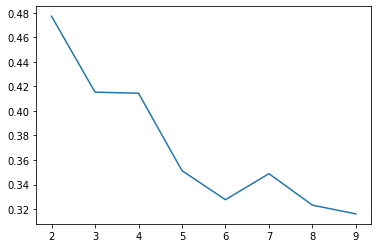

In [886]:
plt.plot(pd.DataFrame(sse)[0],pd.DataFrame(sse)[1])

#### Look at the Elbow Curve plot and choose the optimal number of cluster

In [887]:
ssd = []
for i in list(range(1,10)):
    model_clus = KMeans(n_clusters=i,max_iter=50)
    model_clus.fit(pca_final1)
    ssd.append(model_clus.inertia_)

print(ssd)

[1248.5622869867348, 670.5358616379132, 456.61732563747273, 358.34591513787285, 301.4526671344621, 269.61537030080524, 243.54761956436369, 217.28677357011037, 197.14000241852838]


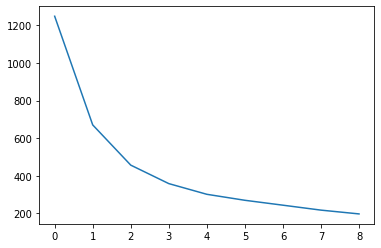

In [888]:
plt.plot(ssd)

#### KMeans with the K the we have choosed that is 3 cluster as looking at the above graph we can identify in elbow curve that cluster in 3 is good

In [889]:
# Performing K-Means clustering with k = 3
model_1 = KMeans(n_clusters=3,random_state=24,max_iter=50)
model_1.fit(pca_final1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=24, tol=0.0001, verbose=0)

In [890]:
# Adding cluster id to the dataframe
model_2 = pd.concat([pca_final.reset_index().drop('index',axis=1),pd.Series(model_1.labels_).reset_index().drop('index',axis=1)],axis=1)
model_2.columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','country','Cluster_Id'] 
model_2.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,country,Cluster_Id
0,-3.444145,0.389904,0.317508,-0.500182,-1.026673,Afghanistan,0
1,0.908371,-0.517803,-0.963546,0.425396,-0.127454,Albania,2
2,0.483992,-1.030763,0.180813,0.591295,0.061194,Algeria,2
3,-2.314707,-1.544240,1.672481,-1.312589,0.257160,Angola,0
4,1.376855,-0.166154,-0.698462,0.012918,-0.070727,Antigua and Barbuda,2


In [891]:
model_2.Cluster_Id.value_counts()

2    88
0    39
1    38
Name: Cluster_Id, dtype: int64

### Plotting the clusterid wrt PCA components

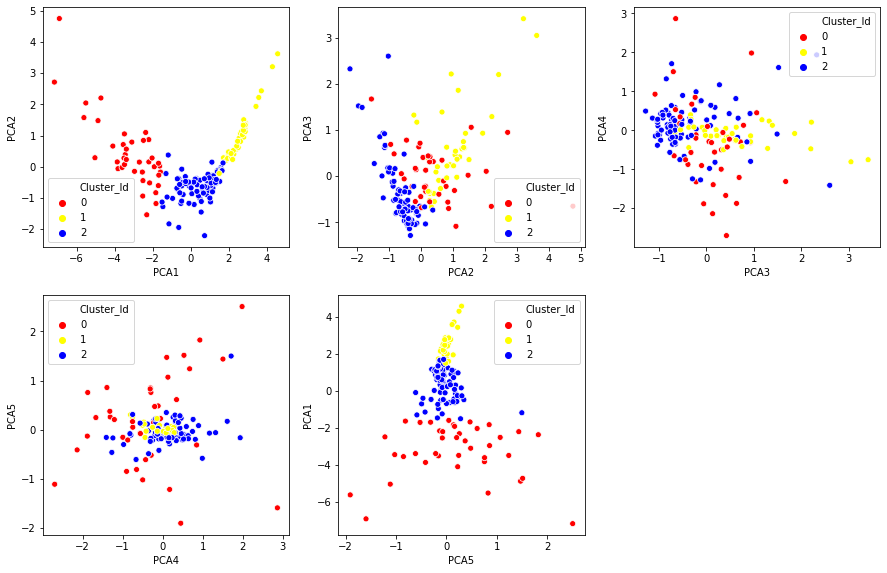

In [892]:
fig = plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x='PCA1',y='PCA2',data=model_2,hue='Cluster_Id',palette= ['red','yellow','blue'])
plt.subplot(3,3,2)
sns.scatterplot(x='PCA2',y='PCA3',data=model_2,hue='Cluster_Id',palette= ['red','yellow','blue'])
plt.subplot(3,3,3)
sns.scatterplot(x='PCA3',y='PCA4',data=model_2,hue='Cluster_Id',palette= ['red','yellow','blue'])
plt.subplot(3,3,4)
sns.scatterplot(x='PCA4',y='PCA5',data=model_2,hue='Cluster_Id',palette= ['red','yellow','blue'])
plt.subplot(3,3,5)
sns.scatterplot(x='PCA5',y='PCA1',data=model_2,hue='Cluster_Id',palette= ['red','yellow','blue'])


### Cluster Profiling

In [893]:
merged_data = pd.merge(df_country,model_2,how='inner',on='country') # merging main dataframe with the last clusterd datframe

In [894]:
merged_data.head() # Looking at merged data's head

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PCA1,PCA2,PCA3,PCA4,PCA5,Cluster_Id
0,Afghanistan,90.2,1.808318,1.370705,8.119349,1610,9.44,56.2,5.82,553,-3.444145,0.389904,0.317508,-0.500182,-1.026673,0
1,Albania,16.6,0.684597,0.160147,1.188264,9930,4.49,76.3,1.65,4090,0.908371,-0.517803,-0.963546,0.425396,-0.127454,2
2,Algeria,27.3,0.860987,0.093498,0.704036,12900,16.10,76.5,2.89,4460,0.483992,-1.030763,0.180813,0.591295,0.061194,2
3,Angola,119.0,1.764873,0.080737,1.215297,5900,22.40,60.1,6.16,3530,-2.314707,-1.544240,1.672481,-1.312589,0.257160,0
4,Antigua and Barbuda,10.3,0.372951,0.049426,0.482787,19100,1.44,76.8,2.13,12200,1.376855,-0.166154,-0.698462,0.012918,-0.070727,2


In [895]:
merged_data = merged_data.drop(['PCA1','PCA2','PCA3','PCA4','PCA5'],axis=1) # dropping PCA columns

In [896]:
merged_data.head() # looking at data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,1.808318,1.370705,8.119349,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,0.684597,0.160147,1.188264,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,0.860987,0.093498,0.704036,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,1.764873,0.080737,1.215297,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,0.372951,0.049426,0.482787,19100,1.44,76.8,2.13,12200,2


In [897]:
df_data = merged_data[['child_mort','income','gdpp','country','Cluster_Id']] # Creating new dtaframe with required column

#### Let's profile the cluster by taking the mean of various attributes

In [898]:
# Taking mean of each columns wrt Cluster id 
clu_chil_mort = pd.DataFrame(df_data.groupby(["Cluster_Id"]).child_mort.mean())
clu_income= pd.DataFrame(df_data.groupby(["Cluster_Id"]).income.mean())
clu_gdpp = pd.DataFrame(df_data.groupby(["Cluster_Id"]).gdpp.mean())

In [899]:
df = pd.concat([clu_chil_mort,clu_income,clu_gdpp], axis=1)  #Concating the calculted mean colummns and creating a new dataframe

In [900]:
df = df.reset_index(drop=True)  # Reseting index 
df.head()

,child_mort,income,gdpp
0,93.297436,2026.641026,894.487179
1,5.636842,45594.736842,41573.684211
2,26.303409,11881.931818,6224.636364


#### Plotting the columns wrt cluster id

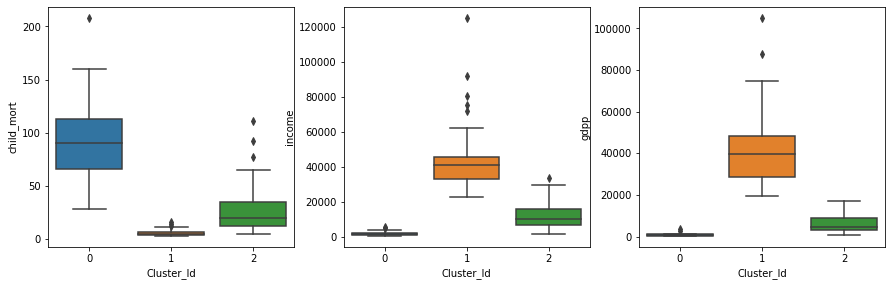

In [901]:
fig = plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(y='child_mort',x='Cluster_Id',data=merged_data)
plt.subplot(3,3,2)
sns.boxplot(y='income',x='Cluster_Id',data=merged_data)
plt.subplot(3,3,3)
sns.boxplot(y='gdpp',x='Cluster_Id',data=merged_data)
plt.show()

In [902]:
custer_0 = df_data.loc[(df_data['Cluster_Id'] == 0)] # Separting data with cluster id 0

In [903]:
custer_0 = custer_0.sort_values(by=['child_mort','income','gdpp'],ascending=False) # Sorting data in descending form to look at the top countries with high child_mort,low income and low gdpp

### Recommendation : <b> <U> Here are the top 5 countries according to the clustering done. This countries should be provided with help 

In [904]:
countries = pd.DataFrame(custer_0['country'].head())
countries.reset_index(drop =True,inplace = True)
countries

,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali


### List of Countries : Haiti,Sierra Leone,Chad,Central African Republic,Mali

## HIERARCHY CLUSTERING

In [905]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [906]:
merged_data1 = df_data.drop('country',axis=1)

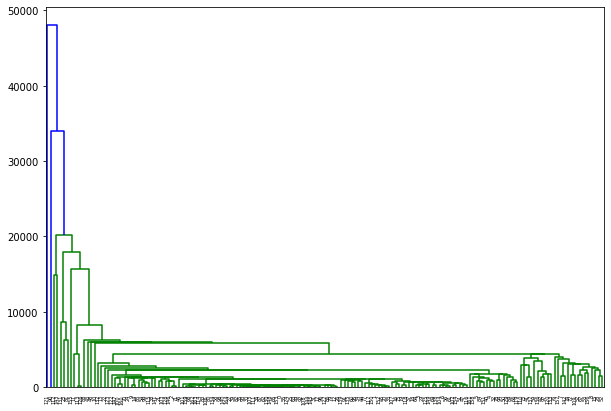

In [907]:
# single linkage
fig = plt.figure(figsize=(10,7))
mergings = linkage(merged_data1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

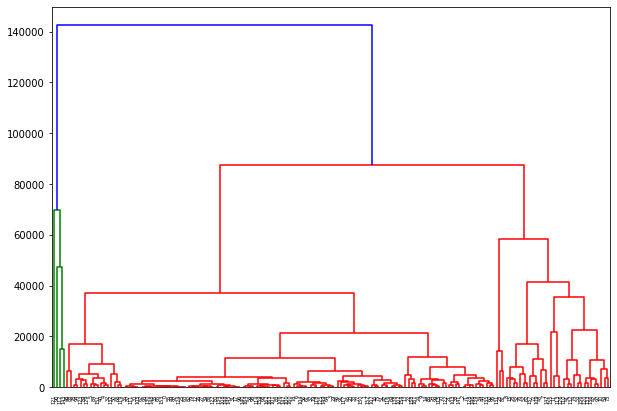

In [908]:
# complete linkage
fig = plt.figure(figsize=(10,7))
mergings = linkage(merged_data1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [909]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [910]:
# assign cluster labels
merged_data1['cluster_labels'] = cluster_labels
merged_data1.head()

,child_mort,income,gdpp,Cluster_Id,cluster_labels
0,90.2,1610,553,0,0
1,16.6,9930,4090,2,0
2,27.3,12900,4460,2,0
3,119.0,5900,3530,0,0
4,10.3,19100,12200,2,0


In [911]:
merged_data1.cluster_labels.unique()

array([0, 1, 2], dtype=int64)

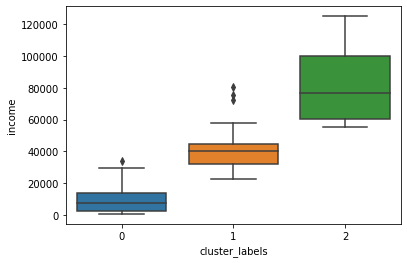

In [912]:
# plots

sns.boxplot(x='cluster_labels', y='income', data=merged_data1)

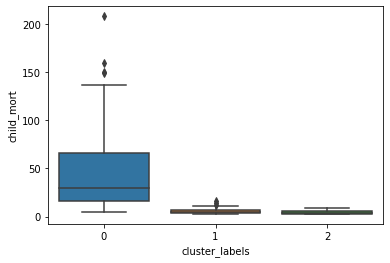

In [913]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=merged_data1)

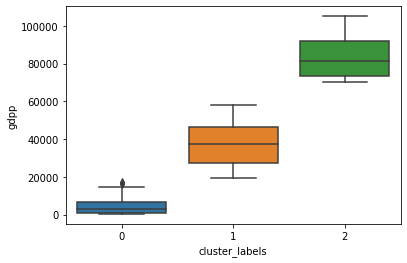

In [914]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=merged_data1)